In [4]:
# import os
# import sys
# sys.path.insert(0, os.path.abspath('../my_modules'))

# print(sys.path)

import os, sys
import h5py
import numpy as np
import pandas as pd
from scipy.interpolate import InterpolatedUnivariateSpline
from scipy import optimize
import matplotlib.pyplot as plt
from scipy import integrate
from scipy.optimize import curve_fit
from scipy.stats import norm
import matplotlib.font_manager as font_manager
from tqdm.autonotebook import tqdm
from matplotlib.backends.backend_pdf import PdfPages
import time
from scipy.optimize import curve_fit
from scipy.stats import norm
from scipy import stats

import etroc0_benchtest


npoints is 2000
events_t is 1000


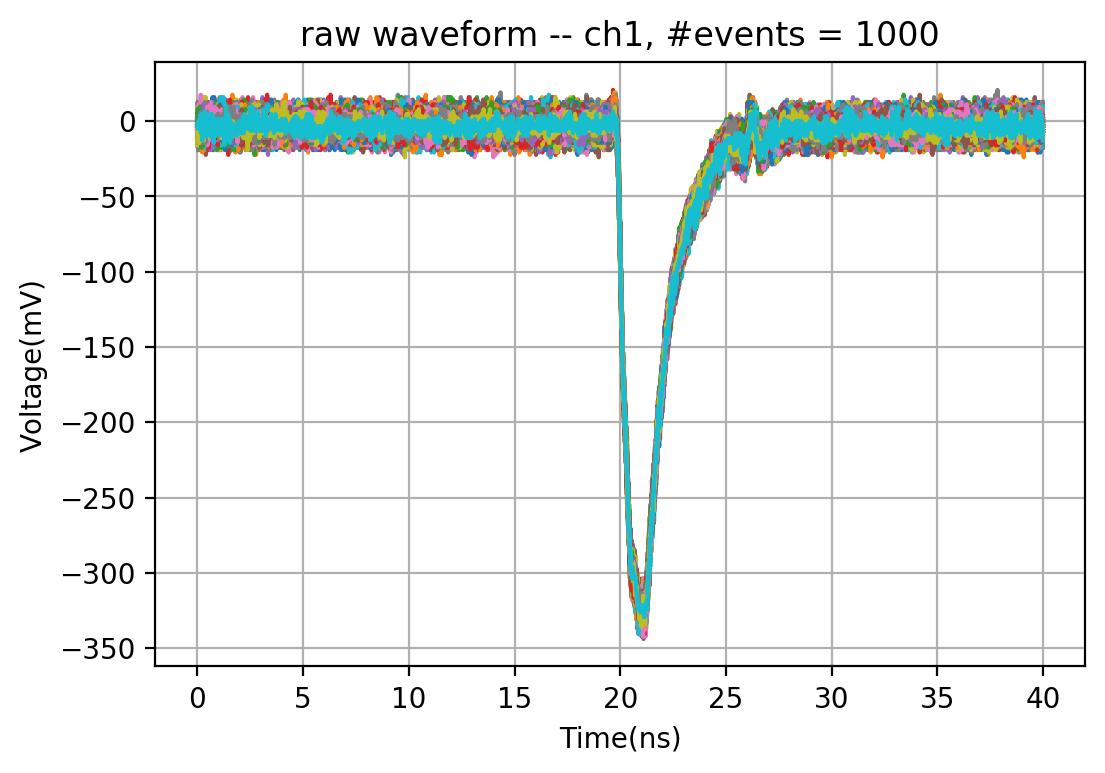

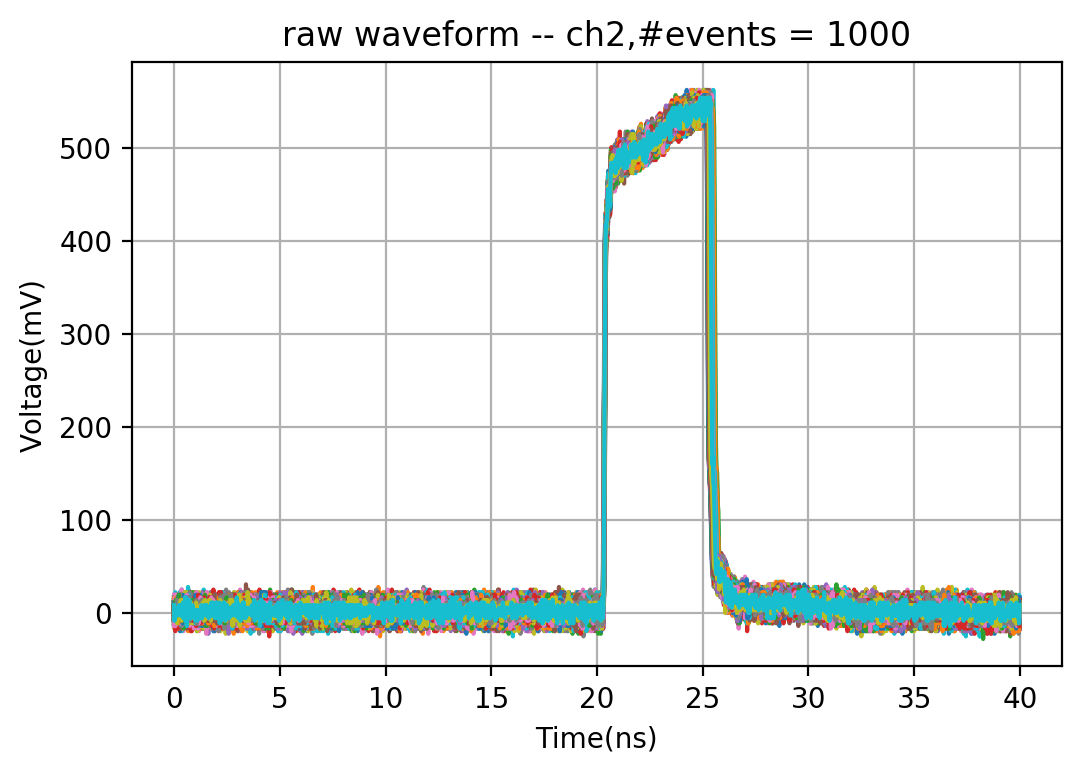

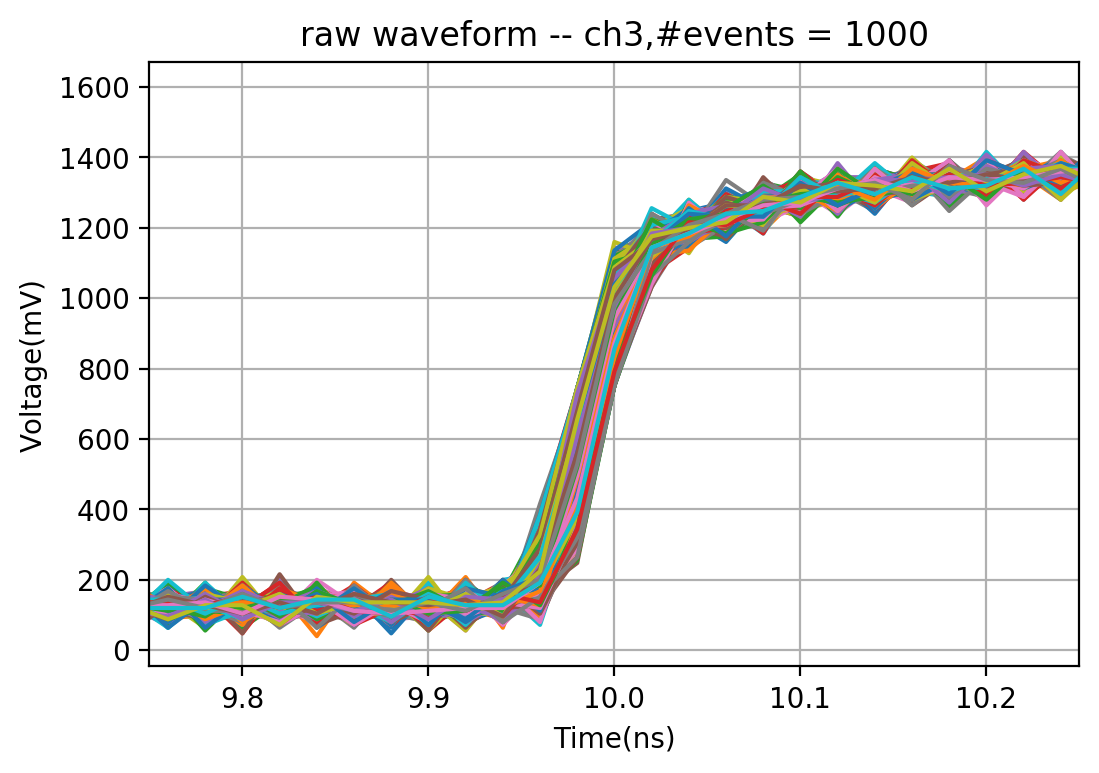

In [5]:
########## ETROC0 batch1 board1 ######################
textstr = '\n'.join((
    '-- ETROC0 batch1 board1',
    '-- baseline = DAC207',
    '-- low power, default gain'))
path ="../../../CMS ETL ASIC/ETROC0/test results/FNAL_Test/202006_ETROC0/"
# file_in = 'DGDP_DAC216_15fC_0.hdf5'
file_in = 'DGHP_DAC322_15fC_0.hdf5'



################## check waveform  #######################

file = path + file_in

data, attrs = etroc0_benchtest.extract_dataset(file)
events_t = attrs['readout_size']
npoints = attrs['nPt']
x = np.arange(npoints)
dt = attrs['dt']

filelist = []
filelist_to_use = [file_in]
for apath in filelist_to_use:
    if apath.find(".hdf5") > -1:
        filelist.append(os.path.join(path,apath))
y_ch1 = []
y_ch2 = []
y_ch3 = []
y_ch4 = []
for item in tqdm(filelist):
    data, attrs = etroc0_benchtest.extract_dataset(item)
    for event in range(len(data[0])):
        y_ch1.append(data[0][event])
    for event in range(len(data[1])):
        y_ch2.append(data[1][event])
    for event in range(len(data[2])):
        y_ch3.append(data[2][event])
    for event in range(len(data[3])):
        y_ch4.append(data[3][event])

events_ch1 = len(y_ch1)
events_ch2 = len(y_ch2)
events_ch3 = len(y_ch3)
events_ch4 = len(y_ch4)
events_t = events_ch1
time = x*dt*1e9




# plt.plot(y_ch1[2109])
print('npoints is',npoints)
print('events_t is',events_t)

# events_t = events_t - 2500
# events_t = events_t - 990


######### Plot signal with points ch1  ###########
fig, ax1 = plt.subplots(dpi=200)
for ab in range(0,events_t):
    ax1.plot(time, y_ch1[ab]*1000)
# ax1.set_xlim(left=15,right=25)
ax1.grid()
ax1.set(xlabel='Time(ns)', ylabel='Voltage(mV)',
       title='raw waveform -- ch1, #events = %d'%(events_t))
# pp.savefig(fig)
plt.show()


######### Plot signal with points ch2  ###########
fig, ax2 = plt.subplots(dpi=200)
for ab in range(0,events_t):
    ax2.plot(time, y_ch2[ab]*1000)
# ax2.set_xlim(left=15,right=20)
ax2.grid()
ax2.set(xlabel='Time(ns)', ylabel='Voltage(mV)',
       title='raw waveform -- ch2,#events = %d'%(events_t))
# pp.savefig(fig)
plt.show()

######### Plot signal with points ch3  ###########
fig, ax3 = plt.subplots(dpi=200)
for ab in range(0,events_t):
    ax3.plot(time, y_ch3[ab]*1000)
ax3.set_xlim(left=9.75,right=10.25)
ax3.grid()
ax3.set(xlabel='Time(ns)', ylabel='Voltage(mV)',
       title='raw waveform -- ch3,#events = %d'%(events_t))
# pp.savefig(fig)
plt.show()

# ######### Plot signal with points ch4  ###########
# fig, ax4 = plt.subplots(dpi=200)
# for ab in range(0,events_t):
#     ax4.plot(time, y_ch4[ab]*1000)
# # ax2.set_xlim(left=60,right=80)
# ax4.grid()
# ax4.set(xlabel='Time(ns)', ylabel='Voltage(mV)',
#        title='raw waveform -- ch4,#events = %d'%(events_t))
# # pp.savefig(fig)
# plt.show()

# plt.close(fig)



calculate charge and amplitude


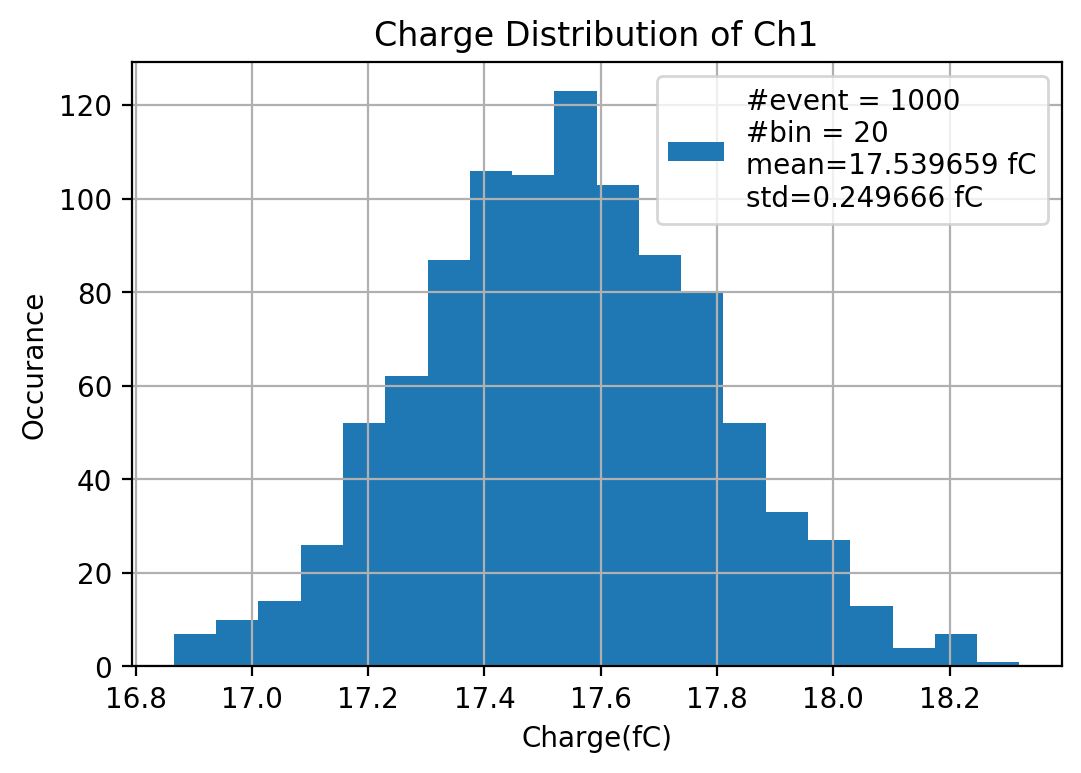

In [6]:
#### deal with amplitude and charge #############################
tdc_start_pa = 18
transCond = 4.4e3
num_bins = 20 
range_q = None

print('calculate charge and amplitude')
pedestal_length = int(tdc_start_pa/(dt*1e9))
v_ch1_shift, ampl_ch1 = etroc0_benchtest.calculate_voltages(y_ch1, pedestal_length=pedestal_length)
v_ch1_shift = np.array(v_ch1_shift)
y_ch1 = np.array(y_ch1)
q_ch1 = etroc0_benchtest.calculate_charge(v_ch1_shift, transCond, time)

mean_ampl, std_ampl = norm.fit(ampl_ch1) 
mean_q, std_q = norm.fit(q_ch1) 

#######plot charge ########3
fig, ax1 = plt.subplots(dpi=200)
ax1.hist(q_ch1, num_bins, range=range_q, density=False, 
         label='#event = %d\n#bin = %d\nmean=%f fC\nstd=%f fC'%(len(q_ch1),num_bins,mean_q,std_q))
ax1.legend()
ax1.grid()
ax1.set(xlabel='Charge(fC)', ylabel='Occurance',
   title='Charge Distribution of Ch1')

plt.show()
plt.close(fig)